# Importing Libraries

Probelem Statement:  Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 


In [85]:
wine=pd.read_csv("wine.csv")
wine.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [86]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [87]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


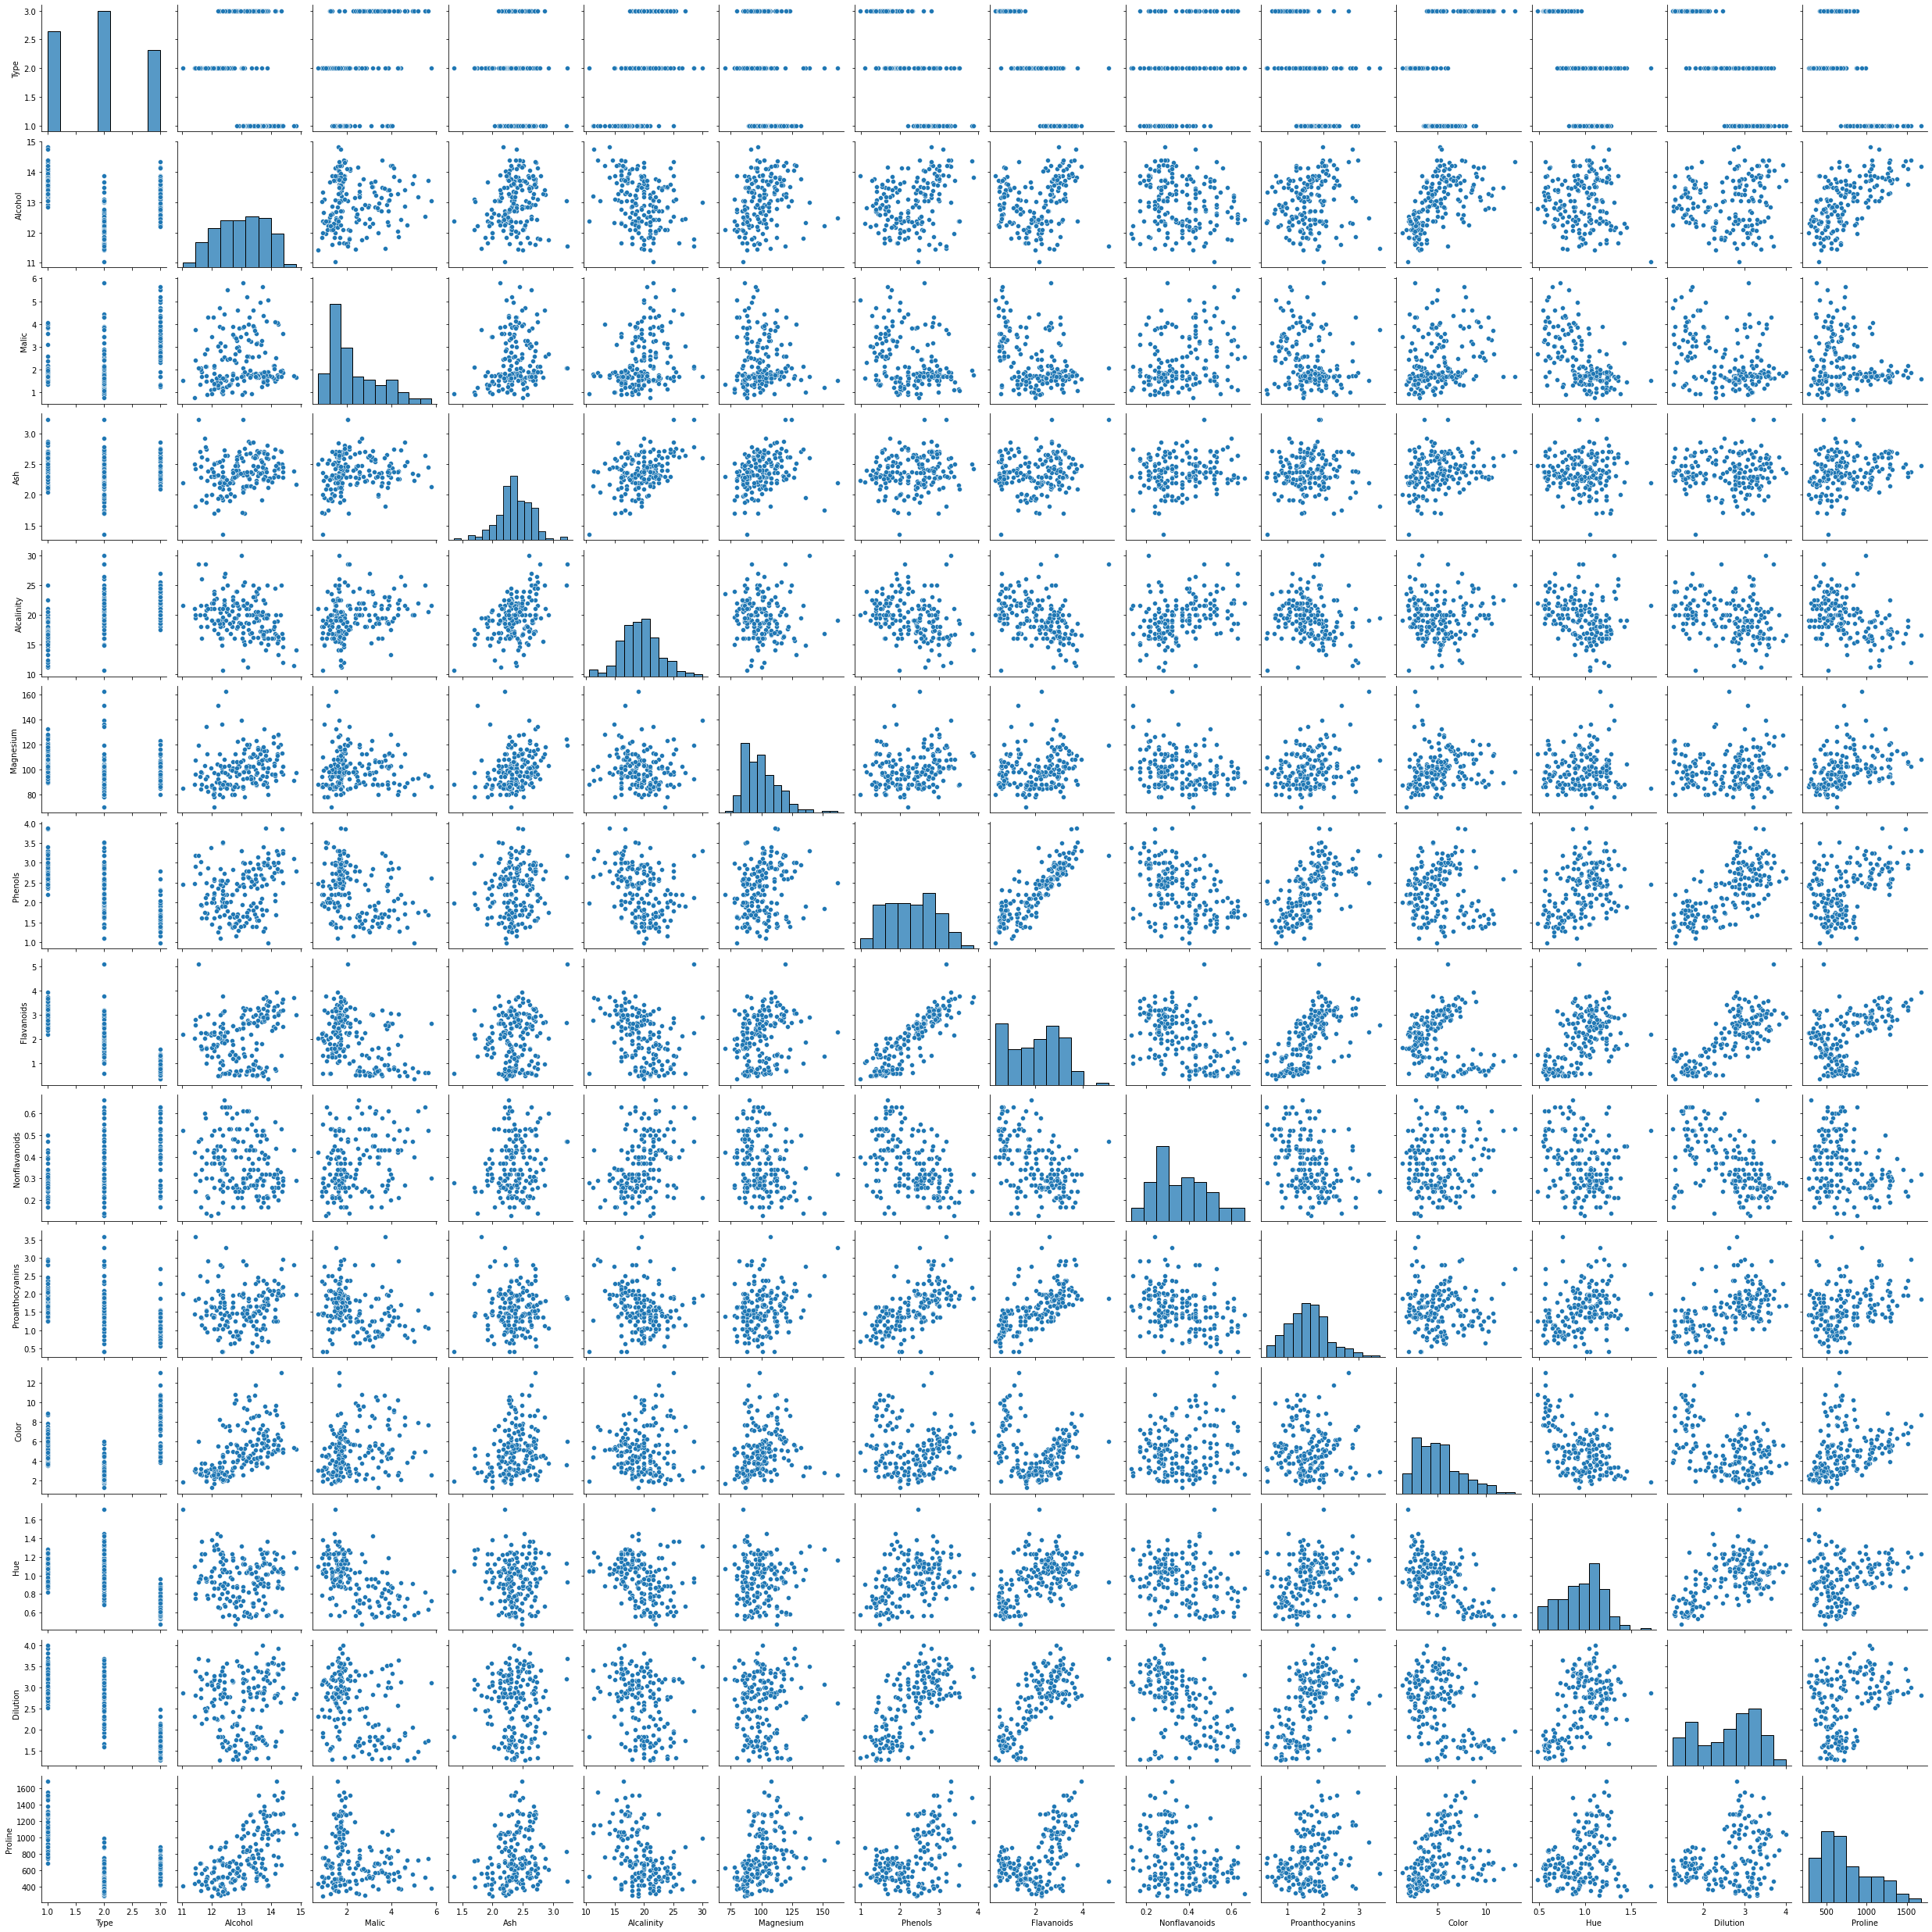

In [88]:
sns.pairplot(wine)

Removing type column as it is a Discrete type whiles other features are Continuous

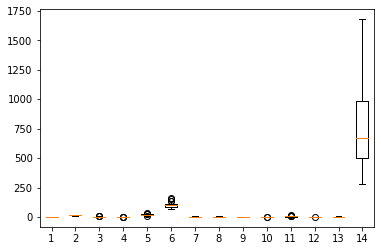

In [89]:
plt.boxplot(wine);

In [90]:
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [91]:
wine.shape

(178, 14)

In [92]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [93]:
wine_new=wine.iloc[:,1:]

In [94]:
wine.shape

(178, 14)

In [95]:
wine_new.shape

(178, 13)

In [96]:
wine.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [97]:
wine_new.head(2)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler=MinMaxScaler()

In [100]:
wine_scaled=scaler.fit_transform(wine_new)

In [101]:
wine_scaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [102]:
wine_scaled=pd.DataFrame(wine_scaled, columns=wine_new.columns)

In [103]:
wine_scaled.head(2)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642


In [104]:
wine_scaled.shape

(178, 13)

In [105]:
pca=PCA(n_components=13)

In [106]:
pca_values=pca.fit_transform(wine_scaled)

In [107]:
pca_values

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [108]:
column_name=["PC0","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"]

In [109]:
# just to give names I have 
wine_pca=pd.DataFrame(pca_values, columns=column_name)
wine_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443,0.049711,-0.020012,-0.008723
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948,0.074158,-0.050838,-0.005249
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270,0.012131,-0.104184,-0.023164
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897,-0.090261,0.103306,-0.052921
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043,-0.019021,-0.084094,-0.034172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,-0.009818,-0.003105,-0.050829,0.043147,0.033437,-0.019795
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,0.047284,-0.047386,-0.081414,-0.050335,0.051438,-0.032272
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,-0.037139,-0.001465,0.073544,0.131167,0.111606,0.038913
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,-0.024662,0.011399,0.196597,0.030275,0.057329,0.011031


In [110]:
wine_pca.shape

(178, 13)

In [111]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [112]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

In [113]:
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

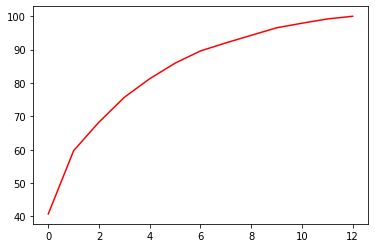

In [114]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [115]:
visualisation_pca=pd.DataFrame(pca_values[:,:7], columns=["PC0","PC1", "PC2", "PC3","PC4","PC5", "PC6"])

In [116]:
visualisation_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188
...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922


In [117]:
visualisation_pca["Type"]=wine["Type"]

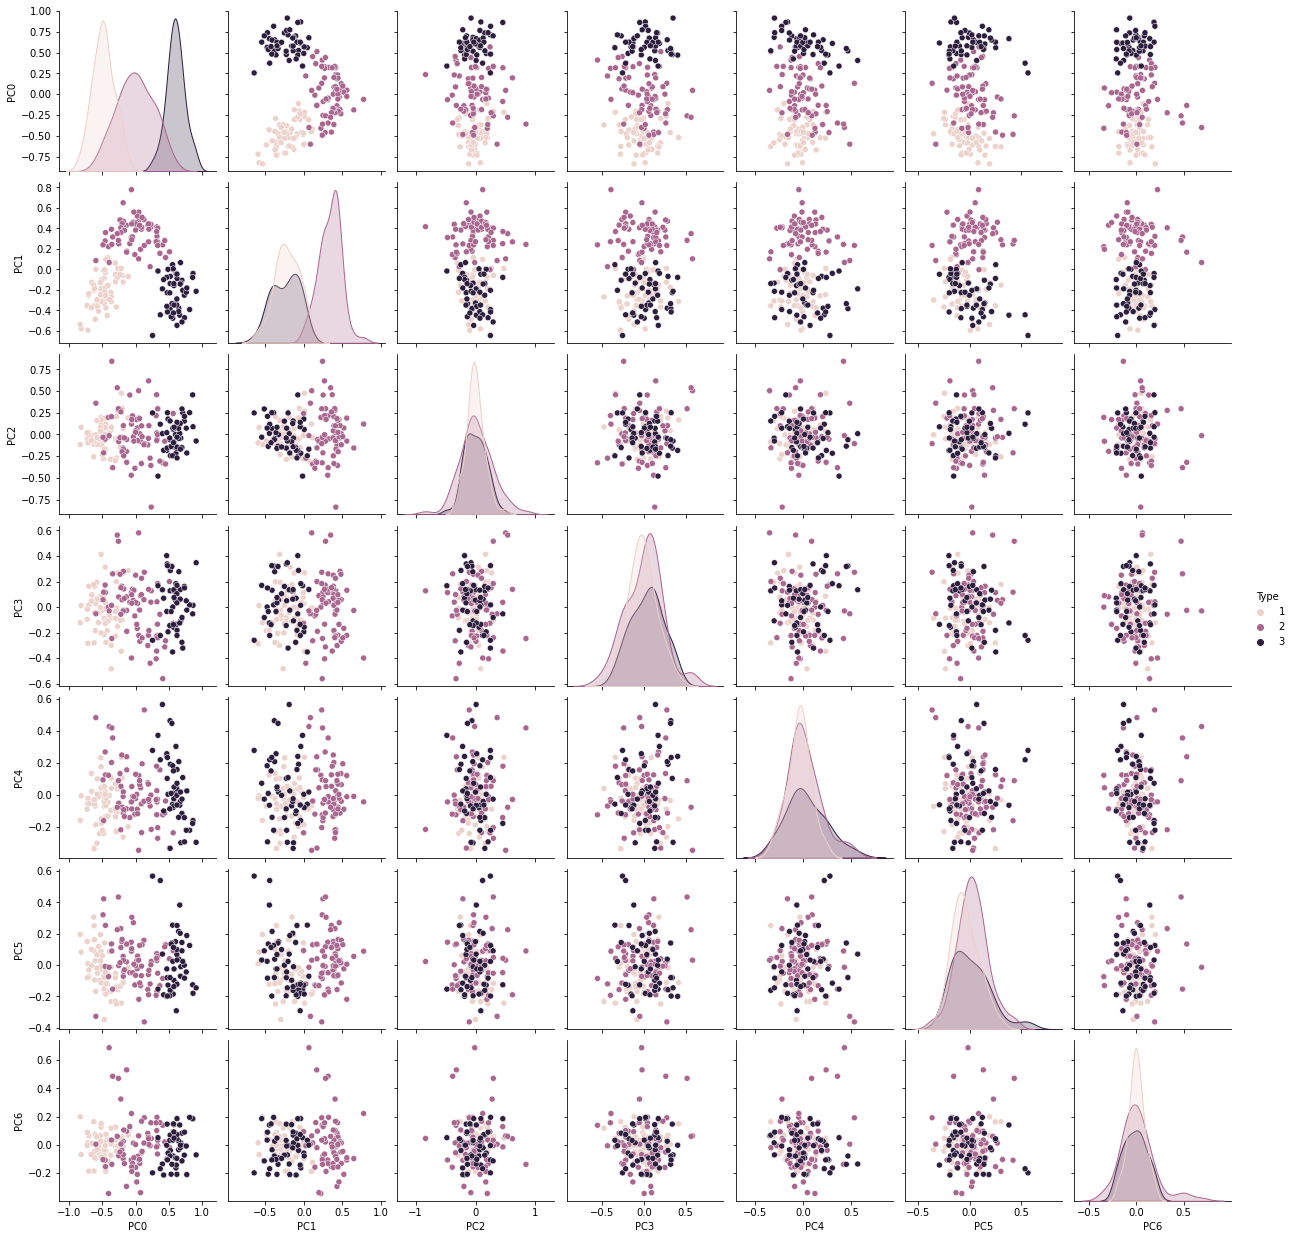

In [118]:

sns.pairplot(visualisation_pca, hue="Type")

## Clustering Hierarchical and K Means with first 3 Component of PCA

### Hierarchical clustering

In [119]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [120]:
clustering=visualisation_pca.iloc[:,:3]
clustering.head()

,PC0,PC1,PC2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


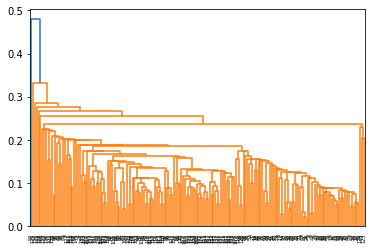

In [121]:
dendogram=sch.dendrogram(sch.linkage(clustering, method="single"))

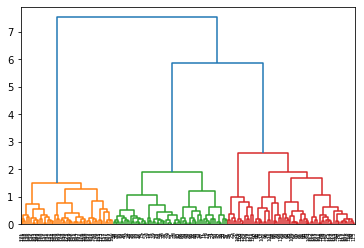

In [122]:
dendogram=sch.dendrogram(sch.linkage(clustering, method="ward"))

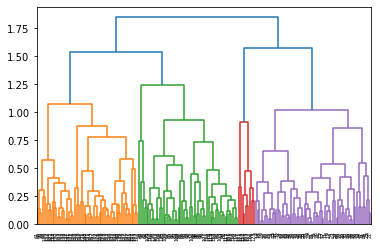

In [123]:
dendogram=sch.dendrogram(sch.linkage(clustering, method="complete"))

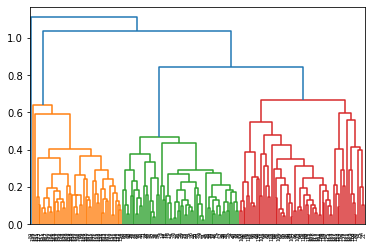

In [124]:
dendogram=sch.dendrogram(sch.linkage(clustering, method="average"))

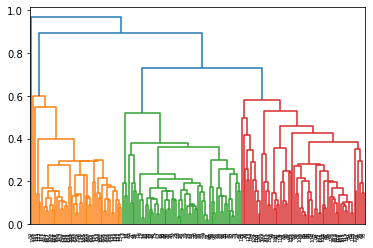

In [125]:
dendogram=sch.dendrogram(sch.linkage(clustering, method="centroid"))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 8 and cut the dendrogram:

We have 4 clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 4 clusters:
going for complete linkage linkage

In [126]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [127]:
y_hc=hc.fit_predict(clustering)

In [128]:
y_hc=pd.DataFrame(y_hc, columns=["Cluster ID"])

In [129]:
clustering["Cluster ID"]=y_hc
clustering.head(2)

,PC0,PC1,PC2,Cluster ID
0,-0.706336,-0.253193,0.024093,3
1,-0.484977,-0.008823,-0.280482,3


In [130]:
clustering["Cluster ID"].value_counts()

3    62
1    54
0    53
2     9
Name: Cluster ID, dtype: int64

In [131]:
clustering["Type"]=wine["Type"]
clustering.head(2)

,PC0,PC1,PC2,Cluster ID,Type
0,-0.706336,-0.253193,0.024093,3,1
1,-0.484977,-0.008823,-0.280482,3,1


In [132]:
clustering.groupby(["Cluster ID"]).mean()

,PC0,PC1,PC2,Type
Cluster ID,,,,
0,-0.041497,0.387846,-0.052392,2.000000
1,0.582815,-0.198998,-0.026759,2.888889
2,0.091377,0.276421,0.469319,2.000000
3,-0.485404,-0.198350,-0.000034,1.048387


0 and 2 cluster has all type 2 wine and cluster 1 has type 3 with few type 2 and cluster 3 has type 1 wine

### K Means

In [133]:
from sklearn.cluster import KMeans

In [134]:
clustering=clustering.iloc[:,:3]

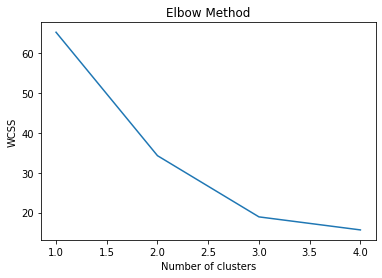

In [135]:
wcss=[]
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(clustering)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [136]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(clustering)

KMeans(n_clusters=3, random_state=42)

In [137]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [138]:
clustering["Clustering ID"]=clusters_new.labels_

In [139]:
clustering.head()

,PC0,PC1,PC2,Clustering ID
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1


In [140]:
clustering["Clustering ID"].value_counts()

1    65
0    62
2    51
Name: Clustering ID, dtype: int64

In [141]:
clustering["Type"]=wine["Type"]
clustering.groupby(["Clustering ID"]).mean()

,PC0,PC1,PC2,Type
Clustering ID,,,,
0,0.017012,0.366126,0.013524,2.000000
1,-0.485040,-0.177429,-0.004604,1.092308
2,0.597506,-0.218959,-0.010573,2.941176


As We can see Even though Type column added afterwards in the data set still we have got the 3 type value as 1, 2 and 3 as their means

## Clustering with original dataset

### Hierarchical Clustering

In [142]:
wine_scaled.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [143]:
wine_scaled.shape

(178, 13)

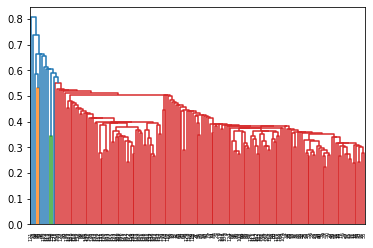

In [144]:
dendogram=sch.dendrogram(sch.linkage(wine_scaled, method="single"))

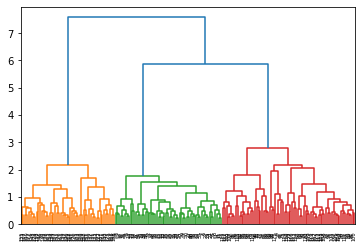

In [145]:
dendogram=sch.dendrogram(sch.linkage(wine_scaled, method="ward"))

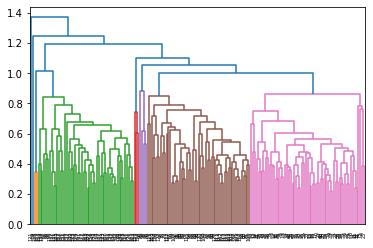

In [146]:
dendogram=sch.dendrogram(sch.linkage(wine_scaled, method="average"))

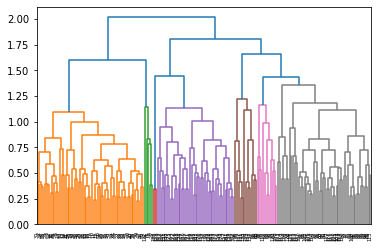

In [147]:
dendogram=sch.dendrogram(sch.linkage(wine_scaled, method="complete"))

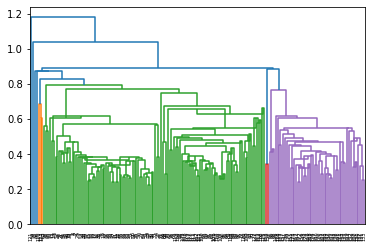

In [148]:
dendogram=sch.dendrogram(sch.linkage(wine_scaled, method="centroid"))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 3 and cut the dendrogram: ward linkage

We have 4 clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 4 clusters:
going for ward linkage linkage

In [149]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [150]:
y_hc=hc.fit_predict(wine_scaled)

In [151]:
y_hc=pd.DataFrame(y_hc, columns=["Cluster ID"])

In [152]:
wine_scaled["Cluster ID"]=y_hc

In [153]:
wine_scaled["Cluster ID"].value_counts()

0    73
1    62
2    43
Name: Cluster ID, dtype: int64

In [154]:
wine_scaled["Type"]=wine["Type"]

In [155]:
wine_scaled.groupby(["Cluster ID"]).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
Cluster ID,,,,,,,,,,,,,,
0,0.329164,0.232471,0.463922,0.480582,0.268910,0.410439,0.334749,0.440682,0.366017,0.169632,0.443435,0.504641,0.177330,2.095890
1,0.702419,0.248566,0.595653,0.358746,0.399369,0.646496,0.563870,0.302495,0.469828,0.357178,0.478626,0.696680,0.580404,1.048387
2,0.575092,0.552900,0.581644,0.564853,0.305865,0.248276,0.093955,0.626591,0.243269,0.531451,0.163925,0.173183,0.246541,2.953488


by looking at the type column mean we can understand that we have 3 seperate cluster based on the wine type

### K Means on Original dataset

In [158]:
wine_scaled.shape

(178, 15)

In [160]:
wine_scaled=wine_scaled.iloc[:,:13]

In [162]:
wine_scaled.shape

(178, 13)

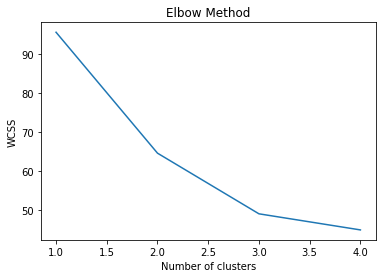

In [163]:
wcss=[]
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [164]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine_scaled)

KMeans(n_clusters=3, random_state=42)

In [165]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [166]:
cluster_org_kmeans=pd.DataFrame(clusters_new.labels_, columns=["K Cluster ID"])
cluster_org_kmeans.head(2)

,K Cluster ID
0,2
1,2


In [167]:
wine_scaled["K Cluster ID"]=cluster_org_kmeans
wine_scaled["Type"]=wine["Type"]

In [168]:
wine_scaled.head(2)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,K Cluster ID,Type
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,2,1


In [169]:
wine_scaled["K Cluster ID"].value_counts()

0    62
2    61
1    55
Name: K Cluster ID, dtype: int64

In [170]:
wine_scaled.groupby(["K Cluster ID"]).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
K Cluster ID,,,,,,,,,,,,,,
0,0.311375,0.236899,0.472917,0.499917,0.247721,0.453059,0.382401,0.411747,0.397425,0.147735,0.473512,0.588976,0.156401,2.000000
1,0.544689,0.478441,0.560136,0.538332,0.311462,0.244765,0.107135,0.618525,0.228276,0.482640,0.192550,0.160906,0.247400,2.872727
2,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894,1.032787


in all the cluster we have found Similarities as cluster formed with respect to type column thogu type column was added to dataset after performing clustering algorithm . it is same for PCA and without PCA . However PCA Reduced the Dimensions without loosing the information